In [3]:
#1.编写 Python程序,判断输入a是否为质数
a = int(input("请输入一个正整数："))
judge = True
for i in range(2,int(a**0.5)+1):
    if a%i==0:
        judge = False
        break
if judge:
    print("a是质数")
else:
    print("a不是质数")

请输入一个正整数： 24


a不是质数


In [11]:
#2.用Python实现插入排序该算法，不允许直接调用插入排序函数，需要手动实现其逻辑过程。
def insertion(a):
    for i in range(1,len(a)):
        key = a[i]
        j = i-1
        while j>=0 and a[j]>key:
            a[j+1] = a[j]
            j-=1
        a[j+1]=key

def printf(a):
    for i in range(len(a)):
        print(a[i],end='')
        print(" ",end='')

arr=[2,3,123,22,4,5]
insertion(arr)
print("排序之后的列表:")
printf(arr)

排序之后的列表:
2 3 4 5 22 123 

In [12]:
#3.用Python实现选择排序该算法，不允许直接调用插入排序函数，需要手动实现其逻辑过程。
def selection(a):
    for i in range(len(a)):
        min = a[i]
        k = i
        for j in range(i+1,len(a)):
            if a[j]<min:
                min = a[j]
                k = j
        if k!=i:
            a[i],a[k]=a[k],a[i]

def printf(a):
    for i in range(len(a)):
        print(a[i],end='')
        print(" ",end='')

arr=[2,3,123,22,4,5]
selection(arr)
print("排序之后的列表:")
printf(arr)

排序之后的列表:
2 3 4 5 22 123 

In [15]:
#4.用Python实现快速排序该算法，不允许直接调用插入排序函数，需要手动实现其逻辑过程。
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    else:
        pivot = arr[0]
        less_than_pivot = [x for x in arr[1:] if x <= pivot]
        greater_than_pivot = [x for x in arr[1:] if x > pivot]
        return quicksort(less_than_pivot) + [pivot] + quicksort(greater_than_pivot)

def printf(a):
    for i in range(len(a)):
        print(a[i],end='')
        print(" ",end='')

arr=[2,3,123,22,4,5]
arr=quicksort(arr)
print("排序之后的列表:")
printf(arr)

排序之后的列表:
2 3 4 5 22 123 


排序算法运行时间表：
       selection_sort  merge_sort  quick_sort
100          0.000000    0.000000    0.000000
1000         0.040514    0.008012    0.004017
10000        3.674457    0.032074    0.024640


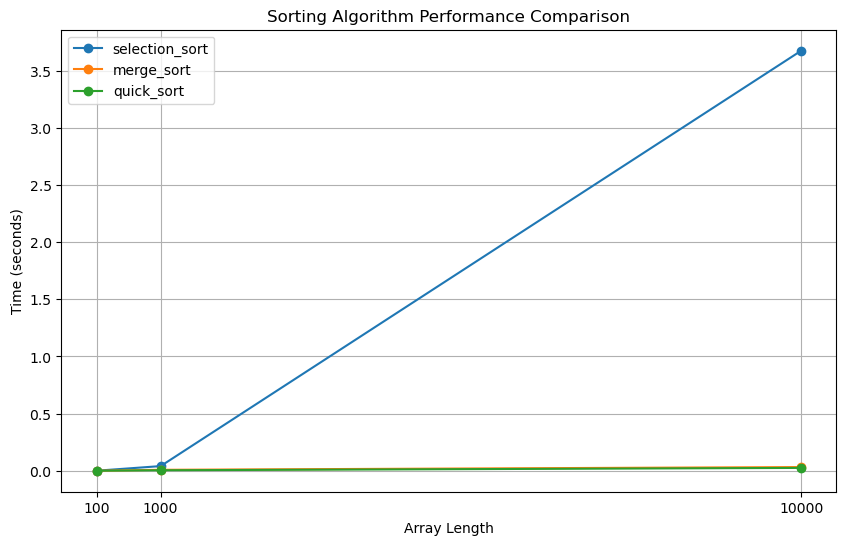

In [19]:
#5.使用 Python 随机生成三组长度递增的随机数列，长度分别为100、1000、10000，对生成的随机数组使用不同的排序算法，例如选择排序和归并排序，至少三种排序方法。对这些数列的数据排序，并分析不同排序算法在不同长度数列下的运行效果，例如运行时间等指标。
import random
import time
import pandas as pd
import matplotlib.pyplot as plt


def generate_random_array(length):
    return [random.randint(1, 10000) for _ in range(length)]

# 选择排序
def selection_sort(arr):
    for i in range(len(arr)):
        min_index = i
        for j in range(i + 1, len(arr)):
            if arr[j] < arr[min_index]:
                min_index = j
        arr[i], arr[min_index] = arr[min_index], arr[i]
    return arr

# 归并排序
def merge_sort(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left_half = merge_sort(arr[:mid])
    right_half = merge_sort(arr[mid:])
    return merge(left_half, right_half)

def merge(left, right):
    sorted_array = []
    i = j = 0
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            sorted_array.append(left[i])
            i += 1
        else:
            sorted_array.append(right[j])
            j += 1
    sorted_array.extend(left[i:])
    sorted_array.extend(right[j:])
    return sorted_array

# 快速排序
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[0]
    less_than_pivot = [x for x in arr[1:] if x <= pivot]
    greater_than_pivot = [x for x in arr[1:] if x > pivot]
    return quick_sort(less_than_pivot) + [pivot] + quick_sort(greater_than_pivot)


lengths = [100, 1000, 10000]
algorithms = [selection_sort, merge_sort, quick_sort]
results = {alg.__name__: [] for alg in algorithms}

for length in lengths:
    random_array = generate_random_array(length)
    
    for sort_algorithm in algorithms:
        array_to_sort = random_array.copy()
        
        start_time = time.time()
        sort_algorithm(array_to_sort)
        end_time = time.time()

        results[sort_algorithm.__name__].append(end_time - start_time)

results_df = pd.DataFrame(results, index=lengths)
print("\n排序算法运行时间表：")
print(results_df)


plt.figure(figsize=(10, 6))
for alg_name, times in results.items():
    plt.plot(lengths, times, marker='o', label=alg_name)  

plt.title('Sorting Algorithm Performance Comparison')
plt.xlabel('Array Length')
plt.ylabel('Time (seconds)')
plt.xticks(lengths) 
plt.legend()  
plt.grid(True)
plt.show()


In [20]:
#6.使用python代码获取当前系统时间
from datetime import datetime

current_time = datetime.now()

print("当前系统时间:", current_time)


当前系统时间: 2024-10-15 15:20:14.642320


In [27]:
#7.homework/data文件夹下的stuGrade.csv文件中包含5位同学的学号、语文成绩、数学成绩和英语成绩，请先用记事本打开该文件，查看文件内容，然后编写Python程序，读取该文件，并计算出各科的平均成绩（保留2位小数）。
import pandas as pd

file_path = r'C:\Users\32535\Desktop\stuGrade.csv'
data = pd.read_csv(file_path)
print(data)

chinese_average = data['chinese'].mean()
math_average = data['math'].mean()
english_average = data['english'].mean()

chinese_average = round(chinese_average, 2)
math_average = round(math_average, 2)
english_average = round(english_average, 2)

print("chinese的平均成绩是：",chinese_average)
print("math的平均成绩是：",math_average)
print("english的平均成绩是：",english_average)

   stuID  chinese  math  english
0  10381       74    87       82
1  10382       92    88       90
2  10383       87    82       81
3  10384       98    97       96
4  10385       62    51       60
chinese的平均成绩是： 82.6
math的平均成绩是： 81.0
english的平均成绩是： 81.8


In [25]:
#8.请在第7题的代码继续编写Python程序，将以下内容写入my.txt文件中，一并上传到github中。
import pandas as pd

file_path = r'C:\Users\32535\Desktop\stuGrade.csv'
data = pd.read_csv(file_path)

chinese_average = data['chinese'].mean()
math_average = data['math'].mean()
english_average = data['english'].mean()

chinese_average = round(chinese_average, 2)
math_average = round(math_average, 2)
english_average = round(english_average, 2)

with open('my.txt', 'w', encoding='utf-8') as file:
    file.write("成绩表:\n")
    data.to_string(file, index=False)
    file.write("\n")
    file.write(f"chinese的平均成绩是：{chinese_average}\n")
    file.write(f"math的平均成绩是：{math_average}\n")
    file.write(f"english的平均成绩是：{english_average}\n")

print("已将结果保存到 my.txt 文件中。")


已将结果保存到 my.txt 文件中。
